In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

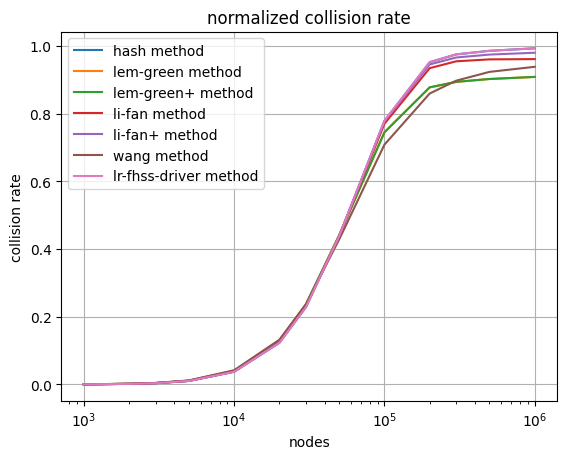

In [23]:
numOCW = 7
numOBW = 280
numGrids = 8
seq_length = 31
startLimit = 500
totalSlots = numOCW * numOBW * (startLimit + seq_length)

data = pd.read_csv('data.csv')
nodes = data['nodes'].to_numpy()
normColRate = data.iloc[:,1:].to_numpy() / totalSlots

for i, method in enumerate(data.keys()[1:]):
    plt.plot(nodes, normColRate[:,i], label=f'{method} method')

plt.title('normalized collision rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
plt.grid()
plt.legend()
plt.show()

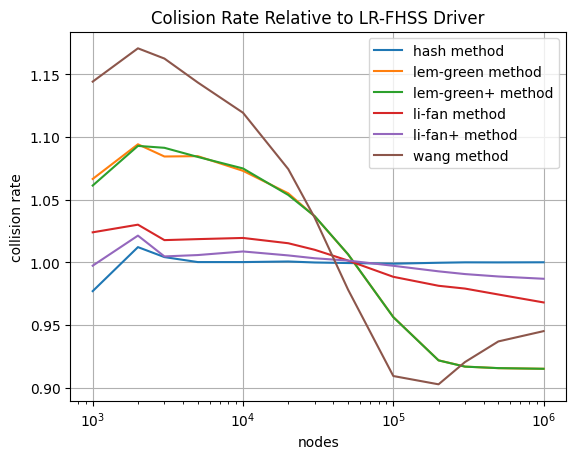

In [24]:
relColRate = data.iloc[:,1:].to_numpy()
for i in range(relColRate.shape[0]):
    relColRate[i] = relColRate[i] / relColRate[i, -1]

for i, method in enumerate(data.keys()[1:-1]):
    plt.plot(nodes, relColRate[:,i], label=f'{method} method')

plt.title('Colision Rate Relative to LR-FHSS Driver')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
plt.grid()
plt.legend()
plt.show()